<a href="https://colab.research.google.com/github/Abbhi1234/6thSem-ML-Lab/blob/main/1BM22CS007_LAB_EXAM_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

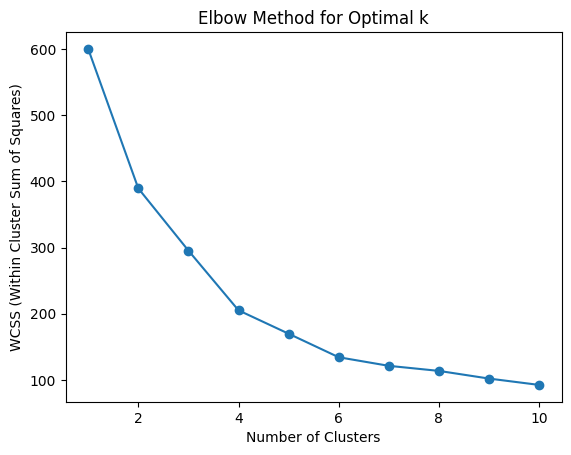

Silhouette Score: 0.41


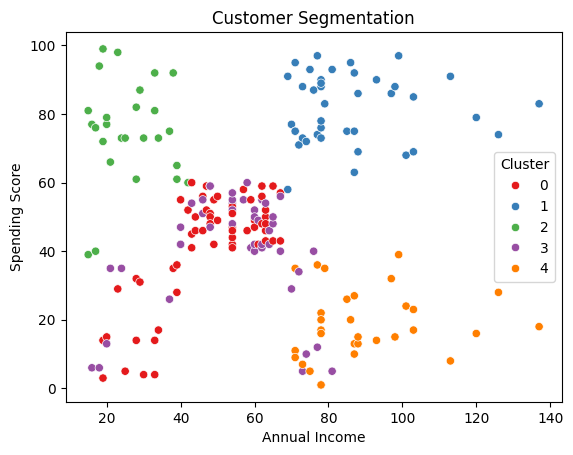

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv('/content/Mall_Customers.csv')  # Ensure you have the dataset

# Selecting relevant features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means with optimal k (assuming k=5 based on elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to data
data['Cluster'] = clusters

# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Visualizing Clusters
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
data = pd.read_csv('Mall_Customers.csv')

# Selecting relevant features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with optimal clusters (e.g., k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Compute accuracy metrics
silhouette_avg = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
wcss = kmeans.inertia_

# Display results
print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.2f}')
print(f'WCSS (Inertia): {wcss:.2f}')


Silhouette Score: 0.41
Davies-Bouldin Index: 0.89
WCSS (Inertia): 169.89
